# Predicting the price of houses using Machine Learning - Linear Regression Model

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [47]:
data = pd.read_csv("HousePricePrediction.csv")
data

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [49]:
data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [50]:
data.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


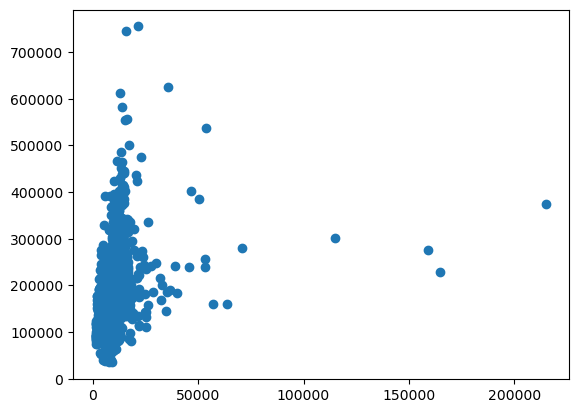

In [51]:
fig, ax = plt.subplots()
ax.scatter(data["LotArea"], data["SalePrice"])

<Axes: ylabel='Frequency'>

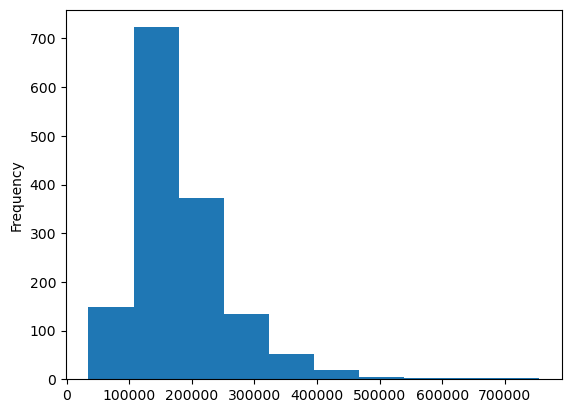

In [52]:
data["SalePrice"].plot.hist()

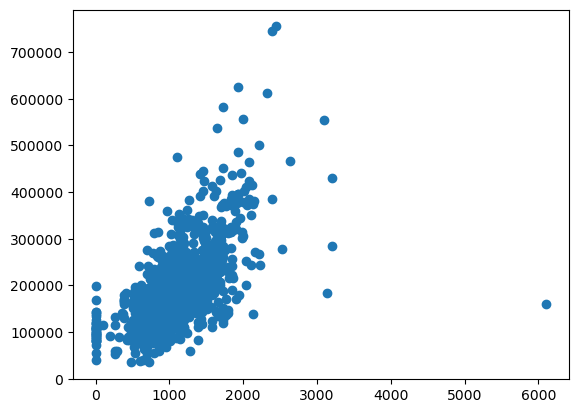

In [53]:
fig, ax = plt.subplots()
ax.scatter(data["TotalBsmtSF"], data["SalePrice"])

In [54]:
#Find the columns which contain objects
for label, content in data.items():
  if pd.api.types.is_object_dtype(content):
    print(label)

MSZoning
LotConfig
BldgType
Exterior1st


In [55]:
#Find the columns which contain strings
for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

LotConfig
BldgType


In [56]:
#This will turn all objects to category values

for label, content in data.items():
  if pd.api.types.is_object_dtype(content):
    data[label] = content.astype("category").cat.as_ordered()

In [57]:
#This will turn all strings to category values

for label, content in data.items():
  if pd.api.types.is_string_dtype(content):
    data[label] = content.astype("category").cat.as_ordered()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Id            2919 non-null   int64   
 1   MSSubClass    2919 non-null   int64   
 2   MSZoning      2915 non-null   category
 3   LotArea       2919 non-null   int64   
 4   LotConfig     2919 non-null   category
 5   BldgType      2919 non-null   category
 6   OverallCond   2919 non-null   int64   
 7   YearBuilt     2919 non-null   int64   
 8   YearRemodAdd  2919 non-null   int64   
 9   Exterior1st   2918 non-null   category
 10  BsmtFinSF2    2918 non-null   float64 
 11  TotalBsmtSF   2918 non-null   float64 
 12  SalePrice     1460 non-null   float64 
dtypes: category(4), float64(3), int64(6)
memory usage: 218.1 KB


In [59]:
data["MSZoning"].cat.categories

Index(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype='object')

In [60]:
data["MSZoning"].cat.codes.value_counts()

 3    2265
 4     460
 1     139
 2      26
 0      25
-1       4
Name: count, dtype: int64

In [61]:
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

Id
MSSubClass
LotArea
OverallCond
YearBuilt
YearRemodAdd
BsmtFinSF2
TotalBsmtSF
SalePrice


In [62]:
#Check for which numeric columns have null values
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

BsmtFinSF2
TotalBsmtSF
SalePrice


In [63]:
#Fill numeric rows with the meean
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      data[label] = content.fillna(content.median())

In [64]:
#Check if there's any null numeric values
for label, content in data.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [65]:
data.isna().sum()

Id              0
MSSubClass      0
MSZoning        4
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     1
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [66]:
#Filling and turning categorical variables to numbers

for label, content in data.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

MSZoning
LotConfig
BldgType
Exterior1st


In [67]:
#Turn categorical variables into numbers and fill missing
for label, content in data.items():
  if not pd.api.types.is_numeric_dtype(content):
    data[label] = pd.Categorical(content).codes + 1

In [68]:
data.isna().sum()

Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [69]:
correlation_matrix = data.corr()

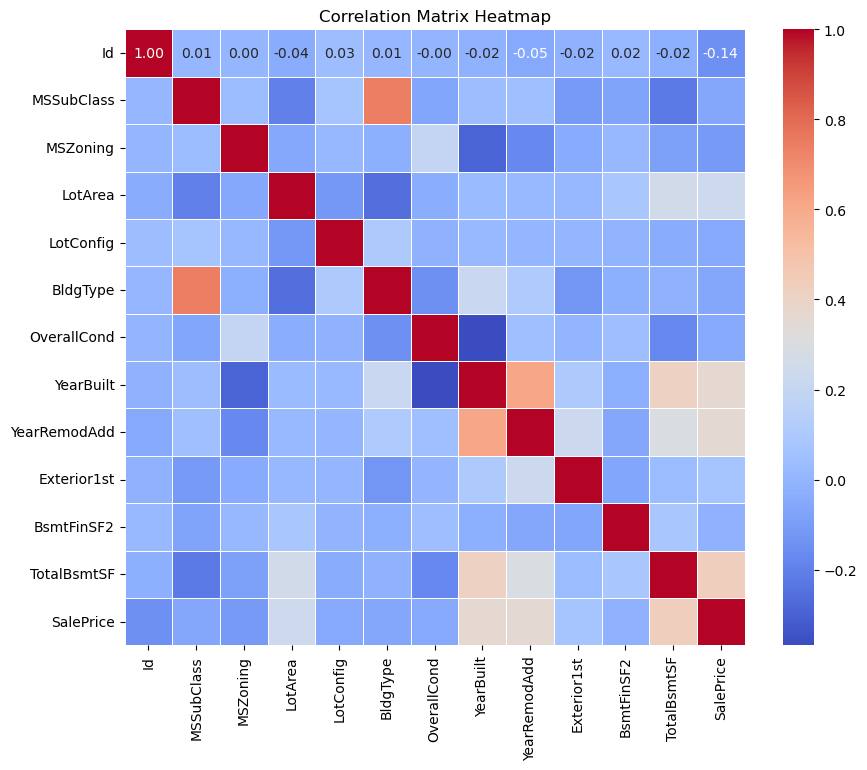

In [70]:
import seaborn as sns

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [76]:
X = data.drop("SalePrice", axis=1)
X

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,0,60,4,8450,5,1,5,2003,2003,13,0.0,856.0
1,1,20,4,9600,3,1,8,1976,1976,9,0.0,1262.0
2,2,60,4,11250,5,1,5,2001,2002,13,0.0,920.0
3,3,70,4,9550,1,1,5,1915,1970,14,0.0,756.0
4,4,60,4,14260,3,1,5,2000,2000,13,0.0,1145.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2914,160,5,1936,5,4,7,1970,1970,6,0.0,546.0
2915,2915,160,5,1894,5,5,5,1970,1970,6,0.0,546.0
2916,2916,20,4,20000,5,1,7,1960,1996,13,0.0,1224.0
2917,2917,85,4,10441,5,1,5,1992,1992,7,0.0,912.0


In [77]:
y = data["SalePrice"]
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
2914    163000.0
2915    163000.0
2916    163000.0
2917    163000.0
2918    163000.0
Name: SalePrice, Length: 2919, dtype: float64

In [78]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   test_size=0.2,
                                                   random_state=42)

In [79]:
len(X_train), len(X_test), len(y_train), len(y_test)

(2335, 584, 2335, 584)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2335, 12), (584, 12), (2335,), (584,))

In [81]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [92]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter space to search
param_grid = {
    'fit_intercept': [True, False],     
}

# Create the Randomized Search CV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [93]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_absolute_error')

In [94]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'fit_intercept': False}


In [95]:
best_model = grid_search.best_estimator_

In [96]:
y_pred = best_model.predict(X_test)
y_pred

array([160616.42837531, 154685.58281578, 143659.03032746, 174415.8283669 ,
       191208.47181078, 210893.6230453 , 141479.35651655, 202432.02547708,
       126819.51948284, 175010.88374365, 169339.39953859, 172553.01342688,
       158312.22446886, 171794.49533553, 187296.74135994, 195078.14010921,
       172129.66577745, 183072.99455569, 163591.04390131, 145599.24074895,
       188810.32623962, 176914.10283882, 145527.84361012, 188820.07863148,
       198286.16157906, 166289.13566369, 187622.10765924, 138325.97591182,
       175253.1211248 , 148641.83995866, 204113.32614657, 143033.91094493,
       188980.17954132, 186071.2770503 , 196636.73116609, 188225.85498489,
       178666.03663152, 147800.71169296, 156229.25704917, 196777.1937169 ,
       125608.69920663, 163899.9523275 , 217328.55982379, 148477.26437454,
       168670.9777027 , 146746.26975641, 190781.91903001, 185692.05867974,
       189534.72100286, 226819.83244441, 166957.98263   , 151649.9105902 ,
       163965.52902402, 1

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [100]:
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("Root Mean squared error: ", rmse)
print("R2 score: ", r2)

Mean absolute error:  32997.0387352112
Mean squared error:  2612058336.0177727
Root Mean squared error:  51108.300069732046
R2 score:  0.2908219341706738
